In [9]:
import utils.glucose as gl
import utils.prep as p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
glucose = pd.read_csv('data-fasting/glucose.csv')

In [11]:
glucose.nunique()

Device                                  1
Serial Number                           1
Device Timestamp                     7248
Record Type                             4
Historic Glucose mmol/L                82
Scan Glucose mmol/L                    77
Non-numeric Rapid-Acting Insulin        0
Rapid-Acting Insulin (units)            0
Non-numeric Food                        1
Carbohydrates (grams)                   1
Carbohydrates (servings)                0
Non-numeric Long-Acting Insulin         0
Long-Acting Insulin Value (units)       0
Notes                                  16
Strip Glucose mmol/L                    0
Ketone mmol/L                           0
Meal Insulin (units)                    0
Correction Insulin (units)              0
User Change Insulin (units)             0
dtype: int64

In [27]:
dtime_lbl='dtime'
g_lbl = 'Historic Glucose mmol/L'
glucose['dtime']=pd.to_datetime(glucose['Device Timestamp'], format='%d-%m-%Y %H:%M')

In [28]:
glucose.set_index(dtime_lbl, inplace=True)

In [29]:
g_period = glucose['2020-03-15':'2020-05-30']

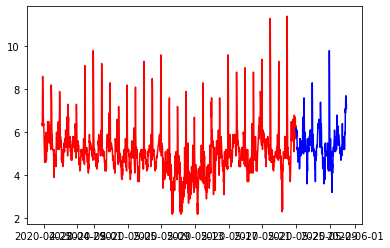

In [37]:
plt.plot(g_period['2020-04-24':'2020-05-24'][g_lbl], color='red')
plt.plot(g_period['2020-05-25':][g_lbl], color='blue')

# Get sleep data

In [41]:
sleep = pd.read_csv('data-fasting/sleep.csv')
readiness = pd.read_csv('data-fasting/readiness.csv')

In [39]:
sleep.nunique()

Unnamed: 0                     71
awake                          54
bedtime_end                    71
bedtime_end_delta              70
bedtime_start                  71
bedtime_start_delta            71
breath_average                 11
deep                           65
duration                       54
efficiency                     18
hr_5min                        71
hr_average                     67
hr_lowest                       9
hypnogram_5min                 71
is_longest                      1
light                          65
midpoint_at_delta              71
midpoint_time                  59
onset_latency                  25
period_id                       2
rem                            55
restless                       16
rmssd                          29
rmssd_5min                     71
score                          24
score_alignment                38
score_deep                      5
score_disturbances             27
score_efficiency               18
score_latency 

In [43]:
readiness.nunique()

summdate_lbl = 'summary_date'

In [44]:
sleep[dtime_lbl] = pd.to_datetime(sleep[summdate_lbl], format='%Y-%m-%d')
readiness[dtime_lbl] = pd.to_datetime(readiness[summdate_lbl], format='%Y-%m-%d')

In [45]:
sleep.set_index(dtime_lbl, inplace=True)
readiness.set_index(dtime_lbl, inplace=True)

In [49]:
sleep.columns

Index(['Unnamed: 0', 'awake', 'bedtime_end', 'bedtime_end_delta',
       'bedtime_start', 'bedtime_start_delta', 'breath_average', 'deep',
       'duration', 'efficiency', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total'],
      dtype='object')

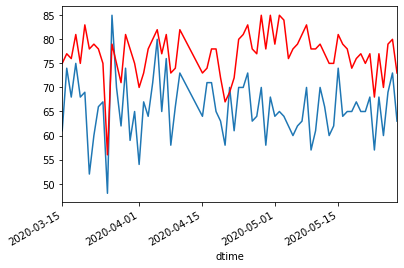

In [57]:
sleep['score'].plot()
readiness['score'].plot(color='red')

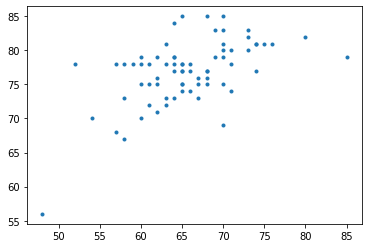

In [59]:
plt.plot(sleep.score, readiness.score, linestyle='none', marker='.')
s_score = np.array(sleep.score)
r_score = np.array(readiness.score)

0.5506548522612632

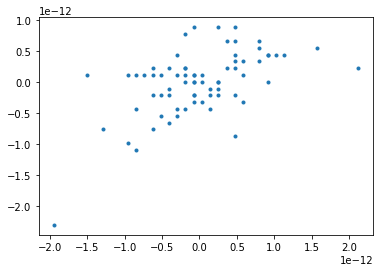

In [87]:

s_score = (s_score-np.mean(s_score))/len(s_score)
r_score = (r_score-np.mean(r_score))/len(r_score)
slope, intercept = np.polyfit(s_score, r_score, deg=1)
plt.plot(s_score, r_score, linestyle='none', marker='.')
x = np.arange(50,85)
y = slope*x + intercept
#plt.plot(x, y)
a, b, c,d = np.polyfit(s_score, r_score, deg=3)
y2 = a*x*x*x + b*x*x + c*x + d
#plt.plot(x, y2)
np.corrcoef(s_score, r_score)[0,1]

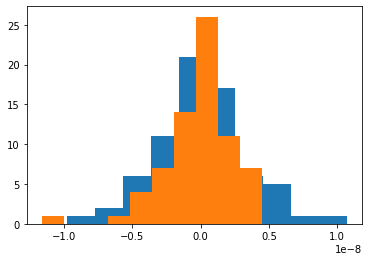

In [84]:
plt.hist(s_score, bins=10)
plt.hist(r_score, bins=10)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1188d4f50>,
 'caps': [<matplotlib.lines.Line2D at 0x1188e6650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1188d4f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1188ef0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1188ef5d0>],
 'means': []}

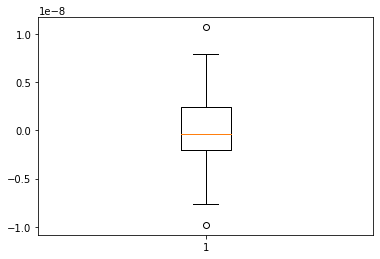

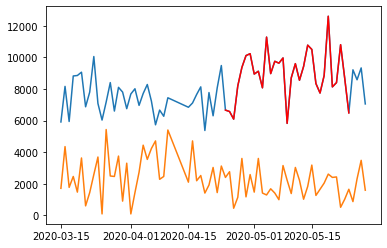

In [89]:
plt.plot(sleep['deep'])
plt.plot(sleep['2020-04-24':'2020-05-24']['deep'], color='red')
plt.plot(sleep['rem'])

No handles with labels found to put in legend.


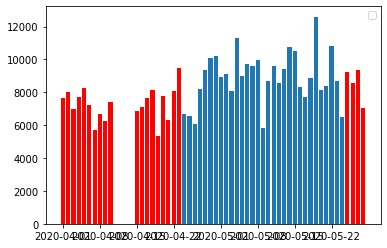

In [104]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['deep'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['deep'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['deep'], color='red')

plt.legend()

No handles with labels found to put in legend.


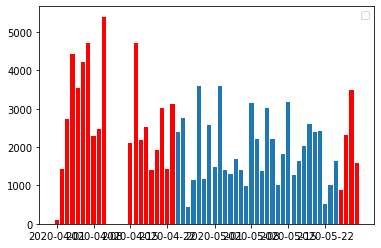

In [105]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['rem'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['rem'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['rem'], color='red')

plt.legend()

No handles with labels found to put in legend.


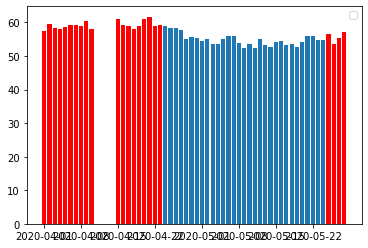

In [111]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['hr_average'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['hr_average'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['hr_average'], color='red')

plt.legend()

No handles with labels found to put in legend.


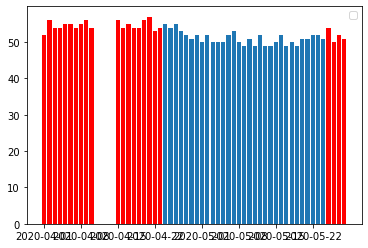

In [112]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['hr_lowest'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['hr_lowest'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['hr_lowest'], color='red')

plt.legend()

No handles with labels found to put in legend.


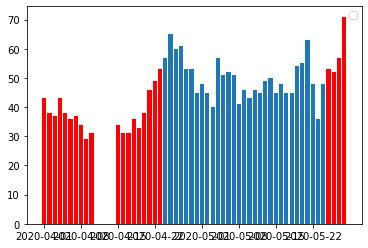

In [115]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['rmssd'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['rmssd'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['rmssd'], color='red')

plt.legend()

In [114]:
sleep.columns

Index(['Unnamed: 0', 'awake', 'bedtime_end', 'bedtime_end_delta',
       'bedtime_start', 'bedtime_start_delta', 'breath_average', 'deep',
       'duration', 'efficiency', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total'],
      dtype='object')

No handles with labels found to put in legend.


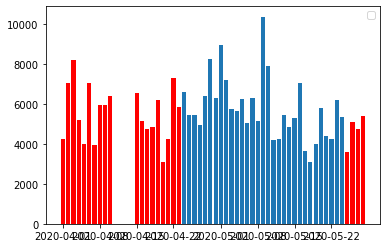

In [120]:
plt.bar(sleep['2020-04-24':'2020-05-24'].index, sleep['2020-04-24':'2020-05-24']['awake'])
plt.bar(sleep['2020-04-01':'2020-04-23'].index, sleep['2020-04-01':'2020-04-23']['awake'], color='red')
plt.bar(sleep['2020-05-25':].index, sleep['2020-05-25':]['awake'], color='red')

plt.legend()